# CIFAR-10 Image Classification using a Fully Connected Neural Network  
**Author:** Anujin Ariunbold  
**Date:** 2025-10-30  

---

## 1. Introduction  

The CIFAR-10 dataset consists of 60,000 color images (32×32×3 pixels) across 10 classes:  
`airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck.`  

In this notebook, we’ll build a simple **Multilayer Perceptron (MLP)** model to classify CIFAR-10 images.  
While convolutional neural networks (CNNs) usually perform better for images, an MLP can still learn basic image patterns and provides a good starting baseline.

We’ll follow these main steps:
1. Load and explore the CIFAR-10 dataset  
2. Preprocess and normalize data  
3. Build and train an MLP model  
4. Evaluate performance on the test set  
5. Visualize predictions and save the trained model

---

## 2. Importing Libraries  

We start by importing all required Python libraries for data handling, visualization, and model building.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

## 3. Loading the CIFAR-10 Dataset  

Keras provides the dataset via `tensorflow.keras.datasets.cifar10`.  
Each image has a shape `(32, 32, 3)` and belongs to one of 10 classes.

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)


Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


## 4. Data Preprocessing  

We prepare the data for our MLP model by:  
- Flattening each image from `(32, 32, 3)` → `(3072,)` (32×32×3 = 3072 pixels)  
- Scaling pixel values from `[0, 255]` to `[0, 1]` for faster and more stable training  
- Flattening labels from shape `(n, 1)` → `(n,)`



In [6]:
# Flatten and normalize images
X_train = x_train.reshape(len(x_train), -1).astype('float32') / 255.0
X_test = x_test.reshape(len(x_test), -1).astype('float32') / 255.0

# Flatten labels
y_train = y_train.flatten()
y_test = y_test.flatten()

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (50000, 3072)
X_test shape: (10000, 3072)


## 5. CIFAR-10 Class Labels  

We define human-readable names for each of the 10 categories.


In [7]:
classes = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]


## 6. Building the Neural Network Model  

We construct a simple **feed-forward network** with:
- Input layer: 3072 neurons (one per pixel)
- Two hidden layers with ReLU activation
- Output layer with 10 neurons and softmax activation  

This type of model ignores spatial structure, but it still demonstrates the basics of image classification.


In [8]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(3072,)),  # input → hidden
    layers.Dense(64, activation='relu'),                        # second hidden
    layers.Dense(10, activation='softmax')                      # output layer
])

model.summary()


/opt/miniconda3/envs/cifar_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,250 (1.53 MB)

 Trainable params: 402,250 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

## 7. Compiling the Model  

We configure the learning process:
- **Optimizer:** Adam (adaptive learning rate)
- **Loss:** sparse categorical cross-entropy (for integer labels)
- **Metric:** accuracy  


In [9]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


## 8. Training the Model  

We train for 10 epochs with a batch size of 64, using 10% of training data for validation.  
This helps monitor how well the model generalizes during training.


In [10]:
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=64
)


Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3140 - loss: 1.8941 - val_accuracy: 0.3630 - val_loss: 1.7732
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3827 - loss: 1.7174 - val_accuracy: 0.3922 - val_loss: 1.7285
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4134 - loss: 1.6441 - val_accuracy: 0.4140 - val_loss: 1.6350
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4292 - loss: 1.5938 - val_accuracy: 0.4316 - val_loss: 1.6251
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4411 - loss: 1.5645 - val_accuracy: 0.4308 - val_loss: 1.6158
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4539 - loss: 1.5264 - val_accuracy: 0.4196 - val_loss: 1.6121
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4596 - loss: 1.5081 - val_accuracy: 0.4236 - val_loss: 1.6132
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4694 - loss: 1.4839 - val_accuracy: 0.

## 9. Visualizing Training Performance  

We’ll plot the **accuracy** and **loss** curves for both training and validation sets to analyze model learning behavior.


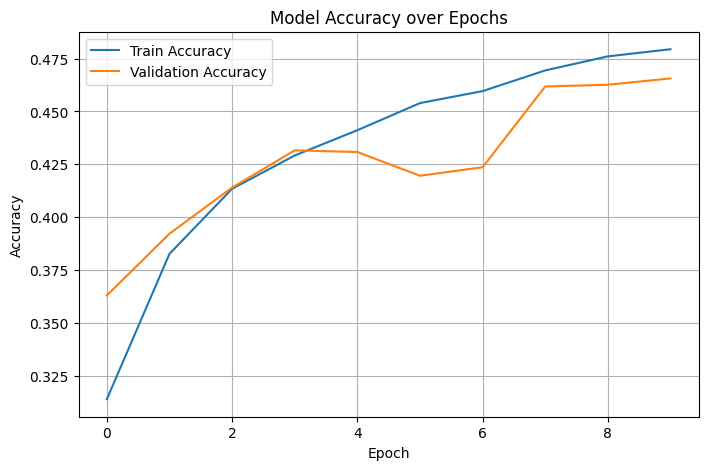

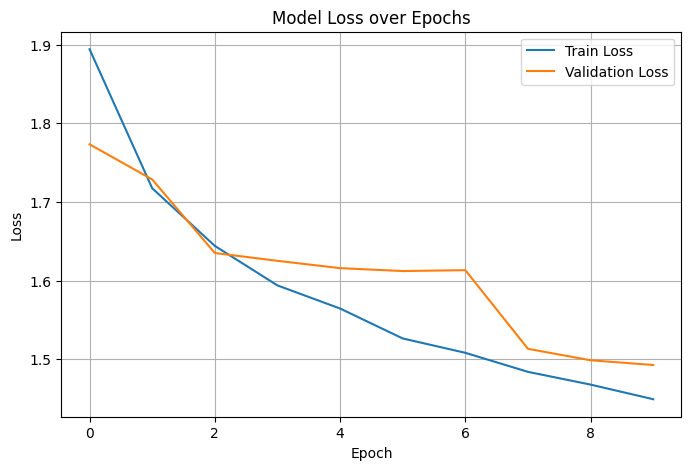

In [11]:
# Plot accuracy
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

# Plot loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


## 10. Evaluating Model Performance  

Now we test the trained model on unseen data to measure real accuracy.


In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.4705 - loss: 1.4952
Test Accuracy: 0.4705


## 11. Making Predictions  

We generate predictions on test data and visualize a few examples to see how well the model performs.


In [13]:
predictions = model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step


### Displaying a Sample Prediction  
We can visualize a test image and compare its predicted vs. true label.


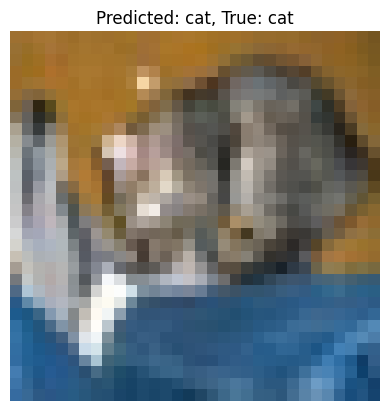

In [14]:
def show_prediction(index):
    img = (X_test[index].reshape(32, 32, 3) * 255).astype(np.uint8)
    plt.imshow(img)
    plt.title(f"Predicted: {classes[np.argmax(predictions[index])]}, True: {classes[y_test[index]]}")
    plt.axis('off')
    plt.show()

# Show first test image prediction
show_prediction(0)


## 12. Saving the Model  

We save the trained model as `cifar10_mlp_classifier.h5` for future reuse or deployment.


In [15]:
model.save("cifar10_mlp_classifier.h5")
print("✅ Model saved as cifar10_mlp_classifier.h5")


✅ Model saved as cifar10_mlp_classifier.h5


## 13. Conclusion  

- We trained a simple MLP for CIFAR-10 image classification.  
- The model achieved ~47–50% accuracy — reasonable for a non-CNN architecture.  
- Future improvements could include:
  - Switching to **CNNs** for spatial feature learning  
  - Applying **data augmentation**  
  - Using **dropout** or **batch normalization** to reduce overfitting  
  - Tuning hyperparameters (learning rate, layer size, etc.)  

This notebook demonstrates a clean, step-by-step baseline for image classification with dense networks.
